# <span style="color:brown">Project 2 : Ames Housing Data and Kaggle Challenge</span>
---
## <span style="color:Blue">Production Model - Model #6a</span>

#### Ryan McDonald
---

### Step 1: Reading the Data 
**Imports/ Read The Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
train = pd.read_csv("../datasets/project_data/clean_train.csv")
pd.set_option('display.max_columns', 75)
train.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,mo_sold,yr_sold,saleprice,ms_zoning_RH,ms_zoning_RL,...,kitchen_qual_Gd,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,total_baths,tot_fin_sq,home_age
0,60,68.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,3,2010,130500,0,1,...,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.5,2012.0,34
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,4,2009,220000,0,1,...,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,3.5,2759.0,13
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,1,2010,109000,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.0,1788.0,57
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,4,2010,174000,0,1,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.5,1444.0,4
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,3,2010,138500,0,1,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.0,1445.0,110


### Step 2: Running Models!
**Kaggle Formating Below Model Iteration**

### MODEL #6a

   **-6(a)th Model will include Polynommial Features with StandardScalar Preprocessing and LASSO Regularization**
   
   **-Conducting model with top 18 best-correlated features (X) to target variable(y) of 'saleprice'**
    


In [3]:
features = ['overall_qual','tot_fin_sq','gr_liv_area','garage_area',
            'garage_cars','total_bsmt_sf','1st_flr_sf','total_baths',
            'year_built','year_remod/add','foundation_PConc','full_bath',
            'exter_qual_Gd','totrms_abvgrd','mas_vnr_area','bsmtfin_type_1_GLQ',
            'fireplaces','neighborhood_NridgHt']

In [4]:
X = train[features]
y = train['saleprice']

In [5]:
# Instantiate PolynomialFeatures!
poly = PolynomialFeatures(degree = 2, interaction_only= False, include_bias = False)
X_pfit = poly.fit_transform(X)
X_pfit.shape

(1995, 189)

In [6]:
# Create train/test splits

X_train, X_test, y_train, y_test = train_test_split(X_pfit, y, test_size= 0.20, random_state=42)

In [7]:
#Scaling the data

sc=StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [8]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1596, 189)
y_train shape is: (1596,)
Z_test shape is: (399, 189)
y_test shape is: (399,)


**Model 6a Evaluation**

In [9]:
# How does the model score with scaled test data?

lr = LinearRegression()
lr.fit(Z_train, y_train)

LinearRegression()

**R2 for train and test data in Model 6a**
    
   **-Very similar to Model 5 on Testing Data!**
   **-Both Ridge and LASSO regularization methods appear to work just as well**

In [10]:
# Score are good, but there is likely high variance based on the 
# differences between train and test scores!

print(f"SS Training R=Squared: {lr.score(Z_train, y_train)}")
print(f"SS Testing R=Squared: {lr.score(Z_test, y_test)}")

SS Training R=Squared: 0.9319239840332769
SS Testing R=Squared: 0.8730062019442635


**Adjusted R^2 for Model 6a (train, test)**

In [11]:
1 - (1-lr.score(Z_train, y_train))*(len(y)-1)/(len(y)-X.shape[1]-1), 1 - (1-lr.score(Z_test, y_test))*(len(y)-1)/(len(y)-X.shape[1]-1)

(0.9313038583817582, 0.8718493758486141)

**RSME for Model 6a**

  **-Improvement over Model 5 as well!**

In [12]:
predictions = lr.predict(Z_train)
predictions.shape

(1596,)

In [13]:
np.sqrt(metrics.mean_squared_error(y_train, predictions))

19460.52395502374

**Introduct Bias to Reduce Variance - LASSO Regression**

In [14]:
# Using mostly base guidelines

lasso_cv = LassoCV( cv = 5, max_iter= 10000)

# Fit model using best ridge alpha!

lasso_cv.fit(Z_train, y_train)

LassoCV(cv=5, max_iter=10000)

In [15]:
lasso_cv.alpha_

66.66841915727466

In [16]:
# Introdcution of more bias effectively decreased the 
# variance between train and test data!

print(f"Lasso CV Training R=Squared: {lasso_cv.score(Z_train, y_train)}")
print(f"Lasso CV Testing R=Squared: {lasso_cv.score(Z_test, y_test)}")

Lasso CV Training R=Squared: 0.91995833828852
Lasso CV Testing R=Squared: 0.8862065659734816


In [17]:
lasso_pred =lasso_cv.predict(Z_train)
lasso_pred
#THEN CALCULATE MSE/ RMSE

array([123502.77015794, 147986.25123537, 181986.29583537, ...,
       214121.38565111, 143643.14870428,  96881.05023277])

In [18]:
# RMSE of $21,101 was not the lowest found in modeling, but it performs well,
# with less variance to new data than previous models!

np.sqrt(metrics.mean_squared_error(y_train, lasso_pred))

21101.606078147517

**RMSE is a little better than Ridge!**

In [50]:
lasso_df.shape


(189, 1)

In [19]:
# Checking out the LASSO Regression Coefficients!
lasso_df = pd.DataFrame(lasso_cv.coef_, columns=['Coefficient'],
                        index = poly.get_feature_names(X.columns))

lasso_df.sort_values(by = "Coefficient", ascending = False).head(39)

,Coefficient
overall_qual tot_fin_sq,19376.799072
overall_qual totrms_abvgrd,16877.078279
overall_qual total_bsmt_sf,15510.506795
gr_liv_area full_bath,11702.563200
gr_liv_area fireplaces,10501.021641
total_baths mas_vnr_area,10253.269250
year_built year_remod/add,10031.212862
tot_fin_sq total_bsmt_sf,9165.880660
garage_cars neighborhood_NridgHt,8941.491840
1st_flr_sf year_remod/add,8819.677305


#### Coefficient Interpretation

**LASSO did a good job minimizing coefficients and lowerer our change of multicollinearity**

    - Top 39 features remain in the model with overall quality- based features topping off the list!
    
    - LASSO is BRUTAL!  Scalling down over 150 variable to zero!
    
    - All others held equal...each remaining features coefficient represents the increase in Sale Price based on a unit increase in its value! There are many good insights here for homeowners.

### Data Visualization

#### With Independance passed by assumption, the remainder of LINEM assumptions, show below, show we are within our boundaries for this type of modeling

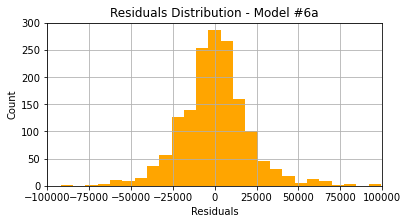

In [20]:
# Residuals Distribution
resids = y_train - lasso_pred
plt.figure(figsize=(6,3))
plt.hist(resids, bins=30, color = 'orange');
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution - Model #6a')
plt.grid()
plt.xlim(-100000, 100000)
plt.ylim(0, 300)
plt.show()

**Residuals distribution is near 'normal'.  Much better normalization than previous models!**

In [21]:
resids = y_train - predictions

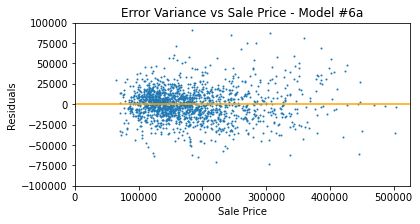

In [22]:
plt.figure(figsize=(6,3))
plt.scatter(predictions, resids, s=1)
plt.axhline(0, color="orange")
plt.xlabel('Sale Price')
plt.ylabel('Residuals')
plt.title('Error Variance vs Sale Price - Model #6a')
plt.xlim(0, 525000)
plt.ylim(-100000, 100000)
plt.show()

**Residuales show a very equal variances of errors.  No major patterns/ skews can be seen from graphing!**


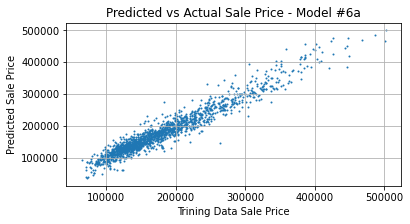

In [52]:
plt.figure(figsize=(6,3))
plt.scatter(predictions, y_train, s=1)

plt.xlabel('Trining Data Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Predicted vs Actual Sale Price - Model #6a')

plt.grid()
plt.show()

**Linearity looks excellent in the above plot**

#### Multicollinearity

**The great thing about LASSO is as our Alpha parameter is increased, the most important feature parameters shrink just a bit, while the least important feature parameters go to zero.  This does a fantastic job of limiting/removing fears of multicollinearity!**

### Model 6a Kaggle Test Setup!
**-Conducting Same EDA as the Train Data to Match Columns/etc.**

In [24]:
kaggle_test = pd.read_csv('../datasets/project_data/test.csv', keep_default_na = False, na_values = [''])

In [25]:
kaggle_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,...,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,...,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,...,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,...,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,...,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,...,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


In [26]:
kaggle_Id = kaggle_test[['Id']]

In [27]:
kaggle_test.columns = kaggle_test.columns.str.replace(' ', '_') 
kaggle_test.columns = kaggle_test.columns.str.lower()
kaggle_test.drop(columns=['alley', 'fireplace_qu', 'fence','low_qual_fin_sf', 'pool_qc','misc_feature', 'misc_val', 'utilities'], inplace=True)

In [28]:
kaggle_test.shape

(878, 72)

In [29]:
kaggle_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,7,2009,WD


In [30]:
kaggle_object = kaggle_test.select_dtypes(include=['object'])
features = kaggle_test.loc[ : , kaggle_object.columns] 
dummies = pd.get_dummies(data=features, drop_first=True)
kaggle_test=pd.concat([kaggle_test, dummies], axis=1)
kaggle_test.shape

(878, 261)

In [31]:
kaggle_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,...,kitchen_qual_Gd,kitchen_qual_Po,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Typ,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,garage_qual_Gd,garage_qual_NA,garage_qual_Po,garage_qual_TA,garage_cond_Fa,garage_cond_Gd,garage_cond_NA,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,...,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,...,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,...,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


**Conducting neccessary EDA on Kaggle Data**

**Adding additional engineered features**

In [32]:
kaggle_test['total_baths']= ((kaggle_test['bsmt_full_bath']+ kaggle_test['full_bath']) + (kaggle_test['bsmt_half_bath'] + kaggle_test['half_bath'])* 0.5)

kaggle_test['tot_fin_sq'] =kaggle_test['bsmtfin_sf_1']+ kaggle_test['bsmtfin_sf_2']+ kaggle_test['gr_liv_area']

kaggle_test['home_age'] = kaggle_test['yr_sold']- kaggle_test['year_built']

kaggle_test['garage_age'] = kaggle_test['yr_sold']- kaggle_test['garage_yr_blt']

In [33]:
kaggle_test.isnull().sum().sort_values(ascending = False).head()

lot_frontage     160
garage_age        45
garage_yr_blt     45
mas_vnr_area       1
mas_vnr_type       1
dtype: int64

#### Dropping Primary 'Object' dtype columns. Dummy columns to remain

In [34]:
kaggle_objects = kaggle_test.select_dtypes(['object'])


kaggle_test.drop(columns=['ms_zoning','street','lot_shape','land_contour',
                          'lot_config','land_slope','neighborhood','condition_1',
                          'condition_2','bldg_type','house_style','roof_style',
                          'roof_matl','exterior_1st','exterior_2nd','mas_vnr_type',
                          'exter_qual','exter_cond','foundation','bsmt_qual',
                          'bsmt_cond','bsmt_exposure','bsmtfin_type_1',
                          'bsmtfin_type_2','heating','heating_qc','central_air',
                          'electrical','kitchen_qual','functional','garage_type',
                          'garage_finish','garage_qual','garage_cond','paved_drive',
                          'sale_type'], inplace=True)

np.nan_to_num(kaggle_test['lot_frontage'], copy=False, nan=68);

kaggle_test['garage_yr_blt'].fillna(0, inplace = True)
kaggle_test['mas_vnr_area'].fillna(0, inplace = True)

kaggle_test.isnull().sum().sort_values(ascending= False)

garage_age           45
condition_1_RRAn      0
condition_1_PosN      0
condition_1_PosA      0
condition_1_Norm      0
                     ..
foundation_CBlock     0
exter_cond_TA         0
exter_cond_Po         0
exter_cond_Gd         0
id                    0
Length: 229, dtype: int64

**Modeling**

In [35]:
features = ['overall_qual','tot_fin_sq','gr_liv_area','garage_area',
            'garage_cars','total_bsmt_sf','1st_flr_sf','total_baths',
            'year_built','year_remod/add','foundation_PConc','full_bath',
            'exter_qual_Gd','totrms_abvgrd','mas_vnr_area','bsmtfin_type_1_GLQ',
            'fireplaces','neighborhood_NridgHt']

In [36]:
kaggle_test_subset=kaggle_test[features] 

In [37]:
trans_kaggle_subset =poly.transform(kaggle_test_subset)


In [38]:
trans_kaggle_subset.shape

(878, 189)

In [39]:
trans_kaggle_subset

array([[6.000e+00, 1.928e+03, 1.928e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 1.967e+03, 1.967e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.000e+00, 2.050e+03, 1.496e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.000e+00, 1.953e+03, 1.211e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 1.480e+03, 8.640e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+00, 1.718e+03, 9.250e+02, ..., 4.000e+00, 0.000e+00,
        0.000e+00]])

In [40]:

sc=StandardScaler()
kaggle_test= sc.fit_transform(trans_kaggle_subset)


In [41]:
kaggle_pred = lasso_cv.predict(kaggle_test)
pred_series = pd.Series(kaggle_pred)

In [42]:
kaggle_test.shape

(878, 189)

In [43]:
kaggle_Id

,Id
0,2658
1,2718
2,2414
3,1989
4,625
...,...
873,1662
874,1234
875,1373
876,1672


In [44]:
kaggle_submission=pd.concat([kaggle_Id, pred_series], axis=1)


In [45]:
kaggle_submission.columns

Index(['Id', 0], dtype='object')

In [46]:
kaggle_submission.rename({0: 'SalePrice'}, axis = 'columns', inplace = True)


In [47]:
kaggle_submission

,Id,SalePrice
0,2658,143240.524584
1,2718,155668.820598
2,2414,189484.234323
3,1989,130033.596252
4,625,177674.837119
...,...,...
873,1662,187921.278342
874,1234,196152.429957
875,1373,146125.577414
876,1672,124338.898259


In [48]:
submission_df = pd.DataFrame(kaggle_submission)

In [49]:
submission_df.to_csv('../datasets/kaggle_submissions/mod6a_predictions_no_index.csv', index= False)